# Análisis de correlación con "tips"

En la clase 10, habíamos introducido este tema a través del Dataset "tips" de Seaborn. Apliquemos entonces los conceptos vistos en clase.

In [1]:
# Importamos librerías
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Cargamos la base de datos tips de Seaborn
tips = sns.load_dataset("tips")

# Visualizar las primeras filas del DataFrame
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [3]:
# Veamos algunos datos estadísticos
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


## EDA gráfico

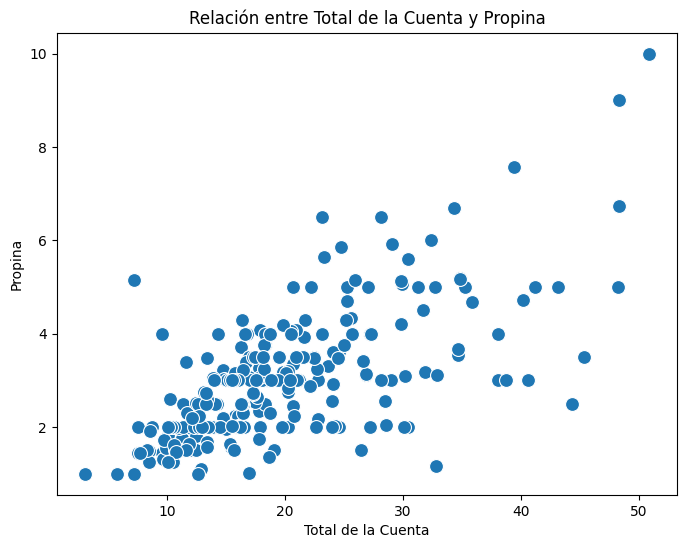

In [5]:
# Hagamos un scatterplot
# Podemos agregar detalles pasando la variable categórica en el atributo hue
plt.figure(figsize=(8, 6))
sns.scatterplot(data=tips, x='total_bill', y='tip',  s=100)
plt.title('Relación entre Total de la Cuenta y Propina')
plt.xlabel('Total de la Cuenta')
plt.ylabel('Propina')
plt.show()

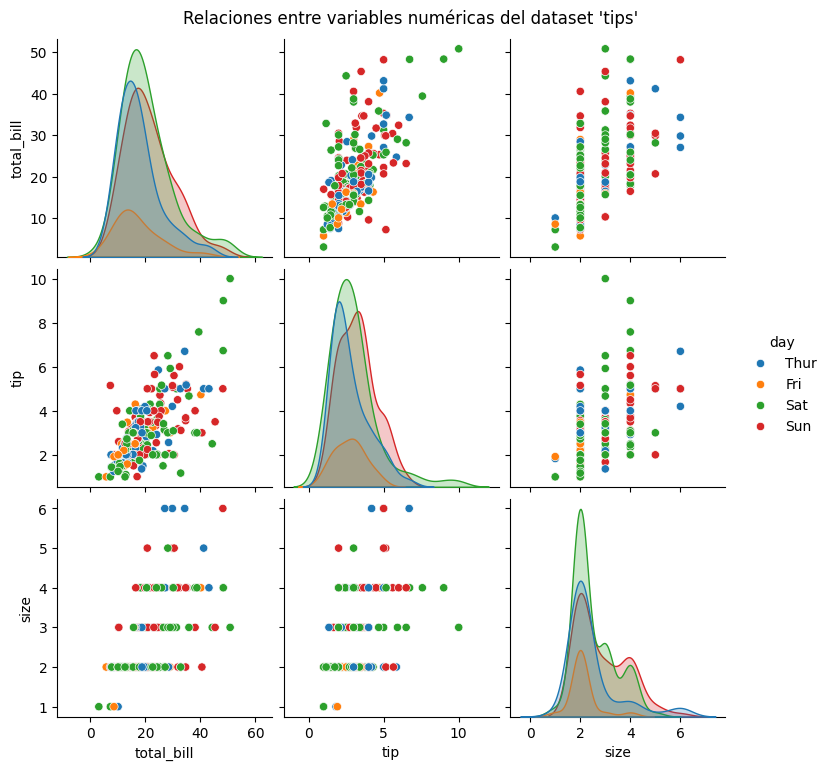

In [6]:
# También podemos crear un pairplot solo con variables numéricas
# sns.pairplot(tips.select_dtypes(include='number'), diag_kind="hist")
sns.pairplot(tips, vars=["total_bill", "tip", "size"], hue="day")
plt.suptitle("Relaciones entre variables numéricas del dataset 'tips'", y=1.02)
plt.show()


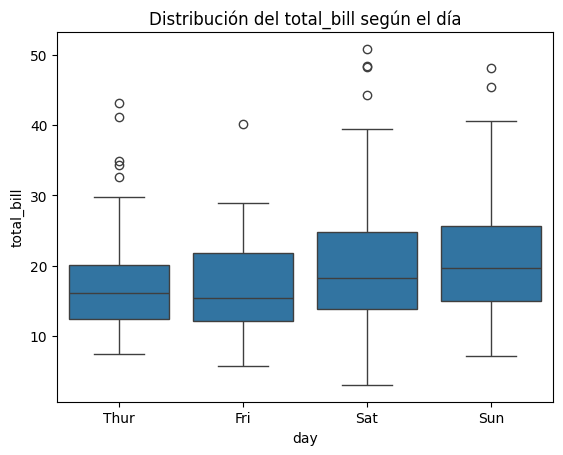

In [7]:
# Para completar el EDA, agreguemos un Boxplot
sns.boxplot(data=tips, x="day", y="total_bill")
plt.title("Distribución del total_bill según el día")
plt.show()


## Correlación

In [9]:
# Creamos la matriz de correlación
# Recordar que solo admite variables numericas, por lo que hay que filtrarlas
# tips_corr = tips.corr()
tips_corr = tips.select_dtypes(include=['number']).corr()
tips_corr

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<Axes: >

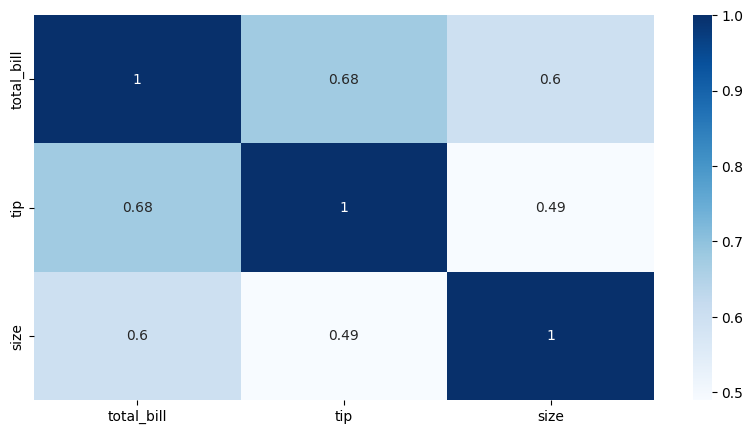

In [10]:
# Usamos tips_corr para graficar un mapa de calor
plt.figure(figsize=(10, 5))
sns.heatmap(tips_corr, annot=True, cmap="Blues")

# Análisis de correlación con "iris"

Al final de la clase 9 presentamos el dataset "iris", apliquemos el concepto de correlación a este dataset.

In [ ]:
# Cargar los datos desde la URL
url = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"
iris = pd.read_csv(url)

# Ver las primeras filas
iris.head()


In [ ]:
# Veamos más detalles con info
iris.info()

In [ ]:
iris.groupby("species").describe()

## EDA gráfico

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=iris, x="species", y="sepal_length", palette="crest")
plt.title("Distribución del largo del sépalo por especie")
plt.xlabel("Especie")
plt.ylabel("Largo del sépalo (cm)")
plt.show()

In [ ]:
iris_specie = iris.copy()
# iris_specie = iris.query("species == 'versicolor'")


In [ ]:
# También podemos crear un pairplot solo con variables numéricas
sns.pairplot(iris_specie, diag_kind="hist") # hue="species"
# sns.pairplot(iris.select_dtypes(include='number'), diag_kind="hist")
plt.suptitle("Relaciones entre variables numéricas del dataset 'iris'", y=1.02)
plt.show()

## Correlación

In [ ]:
# Creamos la matriz de correlación
# Recordar que solo admite variables numericas, por lo que hay que filtrarlas
iris_corr = iris.select_dtypes(include=['number']).corr()
iris_corr

In [ ]:
# Usamos tips_corr para graficar un mapa de calor
plt.figure(figsize=(10, 5))
sns.heatmap(iris_corr, annot=True, cmap="coolwarm")

# Bonus: Análisis amplio con dataset "gapminder-FiveYearData"

Usemos el dataset de expectativa de vida por paises

In [11]:
import pandas as pd

In [12]:
# Cargar en una variable la URL del archivo csv de Github
url = "https://raw.githubusercontent.com/resbaz/r-novice-gapminder-files/master/data/gapminder-FiveYearData.csv"
df = pd.read_csv(url)
df.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


In [13]:
# Para el análisis univariado, agrupamos/agregamos por country-lifeExp
# Seleccionamos 10 países random
agregado1 = df.groupby("country", as_index=False)["lifeExp"].mean()
agregado1 = agregado1.sample(10)
agregado1

,country,lifeExp
71,Kuwait,68.922333
29,Costa Rica,70.181417
47,Germany,73.444417
121,Swaziland,49.002417
35,Djibouti,46.380750
20,Canada,74.902750
22,Chad,46.773583
116,Somalia,40.988667
53,Haiti,50.165250
70,Korea Rep.,65.001000


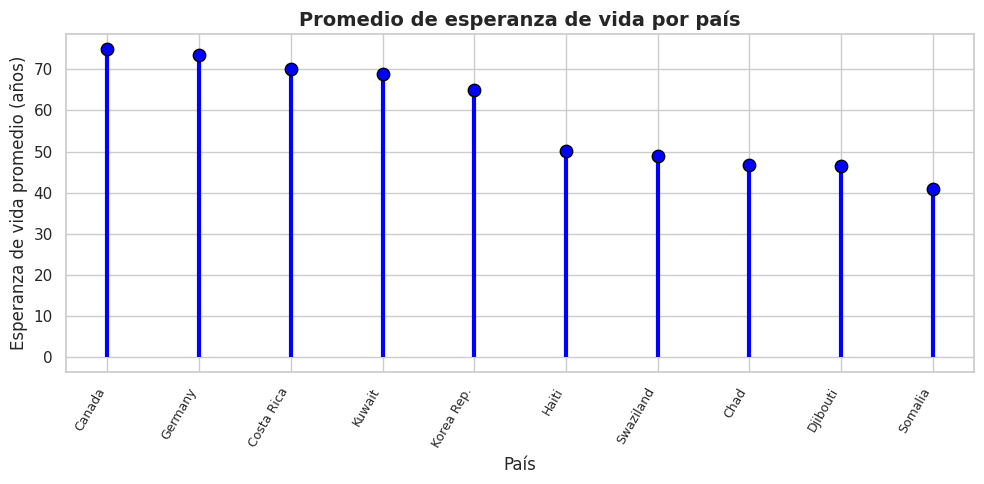

In [14]:
# Graficamos los promedios de lifeExp para cada país
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

# Ordenar los datos (opcional)
data = agregado1.sort_values("lifeExp", ascending=False)

plt.figure(figsize=(10, 5))

# Líneas verticales (desde el eje hasta el valor de lifeExp)
plt.vlines(
    x=data["country"],
    ymin=0,
    ymax=data["lifeExp"],
    color="blue",
    linewidth=3
)

# Bolita en el extremo superior
plt.scatter(
    x=data["country"],
    y=data["lifeExp"],
    color="blue",
    s=80,          # tamaño de la bolita
    edgecolor="black",
    zorder=3        # asegura que quede sobre la línea
)

# Títulos y etiquetas
plt.title("Promedio de esperanza de vida por país", fontsize=14, fontweight="bold")
plt.xlabel("País")
plt.ylabel("Esperanza de vida promedio (años)")
plt.xticks(rotation=60, ha="right", fontsize=9)
plt.tight_layout()
plt.show()




In [15]:
# Para el análisis multivariado, seleccionamos además el GDP
agregado2 = df.groupby("country")[["lifeExp", "gdpPercap"]].mean()

# Filtrar solo los países seleccionados en agregado1
agregado2 = agregado2.loc[agregado1["country"]]
agregado2

,lifeExp,gdpPercap
country,,
Kuwait,68.922333,65332.910472
Costa Rica,70.181417,5448.610779
Germany,73.444417,20556.684433
Swaziland,49.002417,3163.352358
Djibouti,46.380750,2697.833162
Canada,74.902750,22410.746340
Chad,46.773583,1165.453674
Somalia,40.988667,1140.793252
Haiti,50.165250,1620.739290


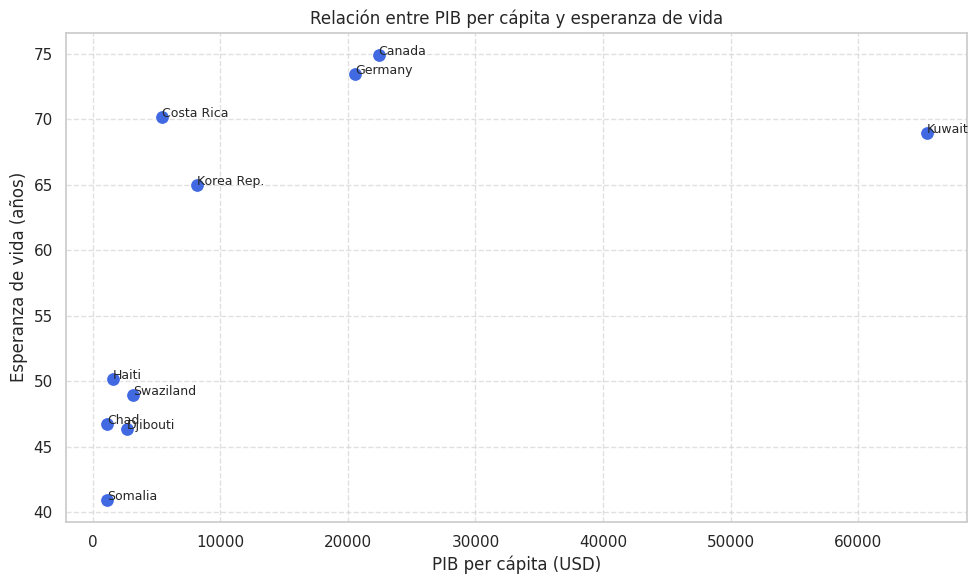

In [16]:
# Ahora analizamos como impacta además el GDP per capita
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=agregado2,
    x="gdpPercap",
    y="lifeExp",
    s=100,             # tamaño de los puntos
    color="royalblue"
)

# Agregar etiquetas con los nombres de los países
for country in agregado2.index:
    plt.text(
        x=agregado2.loc[country, "gdpPercap"],
        y=agregado2.loc[country, "lifeExp"],
        s=country,
        fontsize=9
    )

plt.title("Relación entre PIB per cápita y esperanza de vida")
plt.xlabel("PIB per cápita (USD)")
plt.ylabel("Esperanza de vida (años)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


## Correlación

In [ ]:
df.info()

In [17]:
corr_matrix = df.select_dtypes(include=['number']).corr()
print(corr_matrix)

               year       pop   lifeExp  gdpPercap
year       1.000000  0.082308  0.435611   0.227318
pop        0.082308  1.000000  0.064955  -0.025600
lifeExp    0.435611  0.064955  1.000000   0.583706
gdpPercap  0.227318 -0.025600  0.583706   1.000000


<Axes: >

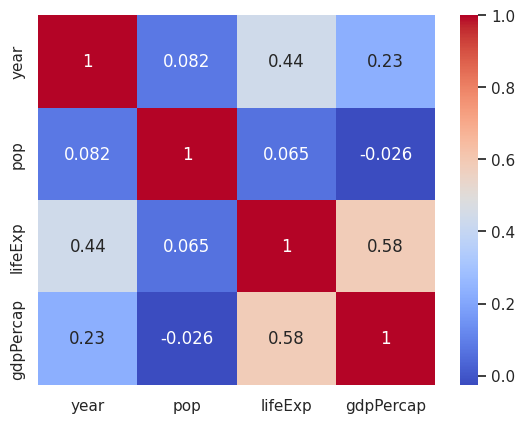

In [21]:
# calculamos un mapa de calor de la matriz de correlacion corr_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

In [19]:
# Filtramos por gdp menor a un umbral
umbral = 10000
df_gdp_menor_umbral = df[df["gdpPercap"] < umbral]

<Axes: xlabel='gdpPercap'>

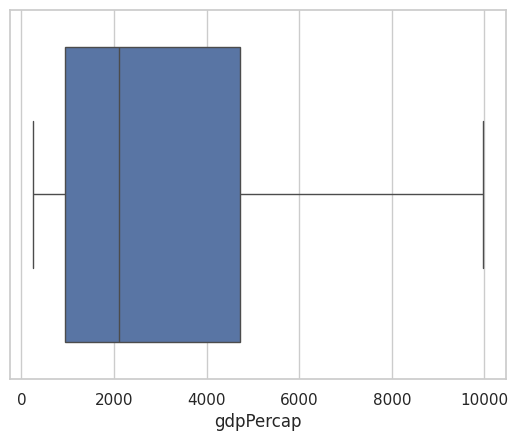

In [20]:
sns.boxplot(data=df_gdp_menor_umbral, x="gdpPercap")

In [ ]:
# Graficamos un scatterplot entre lifeExp vs gdpPercap
sns.scatterplot(data=df_gdp_menor_umbral, x="gdpPercap", y="lifeExp")
#

In [ ]:
# Y ahora el mapa de calor
corr_matrix = df[df["gdpPercap"] < 10000].select_dtypes(include=['number']).corr(method="pearson")
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

## Distancia de Mahalanobis

La distancia de Mahalanobis mide cuán lejos está un punto de un conjunto de datos, teniendo en cuenta la correlación entre las variables.
A diferencia de la distancia euclidiana, ajusta por la escala y la dependencia entre variables.

* Covarianza → muestra si las variables suben o bajan juntas.

* Correlación → mide cuán alineadas están (sin unidades).

* Mahalanobis → usa esa información (las correlaciones y varianzas) para medir distancias respetando la forma real del conjunto de datos.

In [22]:
import pandas as pd
import numpy as np
from scipy.spatial import distance

In [23]:
# Agrupamos por country, lifeExp, gdpPercap y agregamos por year
df_mah = df.groupby(["country", "lifeExp", "gdpPercap", "pop"], as_index=False)["year"].mean().copy()

# Variables que vamos a usar
features = ["lifeExp", "gdpPercap", "pop"]

# Subconjunto numérico
X = df_mah[features]

In [24]:
# Calculamos la matriz de covarianzas e inversa
cov_matrix = np.cov(X, rowvar=False)
inv_cov = np.linalg.inv(cov_matrix)

# Media global
mean_vector = X.mean().values

In [25]:
# Función para calcular distancia de Mahalanobis a todos los países
def mahalanobis_distances(X, reference_row, inv_cov):
    diffs = X - reference_row
    left = np.dot(diffs, inv_cov)
    mahal = np.sqrt(np.sum(left * diffs, axis=1))
    return mahal

In [28]:
# Elegimos el país de referencia (por ejemplo, Argentina)
pais_ref = "Germany"
x_ref = X[df_mah["country"] == pais_ref].values[0]

df_mah["mahalanobis"] = mahalanobis_distances(X.values, x_ref, inv_cov)

In [29]:
# ------------------------------------------------------------
# Mostramos los 10 países más "cercanos"
# ------------------------------------------------------------
df_mah_sorted = df_mah[["country", "mahalanobis"]].sort_values("mahalanobis")
print(df_mah_sorted.head(10))


       country  mahalanobis
564    Germany     0.000000
729       Iran     0.127343
1580    Turkey     0.183653
728       Iran     0.186374
1533  Thailand     0.189503
1581    Turkey     0.191309
991     Mexico     0.201632
730       Iran     0.216095
770      Italy     0.227595
769      Italy     0.239906


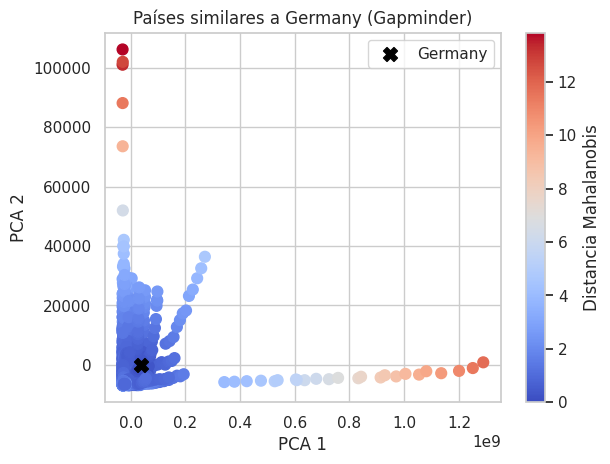

In [30]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
coords = pca.fit_transform(X)

plt.scatter(coords[:, 0], coords[:, 1], c=df_mah["mahalanobis"], cmap="coolwarm", s=60)
plt.colorbar(label="Distancia Mahalanobis")
plt.title(f"Países similares a {pais_ref} (Gapminder)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

# resaltamos el país de referencia
ref_index = df_mah[df_mah["country"] == pais_ref].index[0]
plt.scatter(coords[ref_index, 0], coords[ref_index, 1], color="black", marker="X", s=100, label=pais_ref)
plt.legend()
plt.show()
